In [1]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [2]:
DataFolder = "/content/drive/MyDrive/SDAAI/Capstone Project"

In [3]:
pip install ultralyticsplus

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [4]:
import torch

# Model
model = torch.hub.load('ultralytics/yolov5', 'yolov5s') 

Using cache found in /root/.cache/torch/hub/ultralytics_yolov5_master
YOLOv5 🚀 2023-3-8 Python-3.8.10 torch-1.13.1+cu116 CPU

Fusing layers... 
YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients
Adding AutoShape... 


In [5]:
image_path = DataFolder+"/Safety Hat/Images/hard_hat_workers0.png" # or file, Path, PIL, OpenCV, numpy, list

# Inference
results = model(image_path) 

# Results
results.print()  # or .show(), .save(), .crop(), .pandas(), etc.

image 1/1: 416x416 12 persons
Speed: 29.0ms pre-process, 444.7ms inference, 1.9ms NMS per image at shape (1, 3, 640, 640)


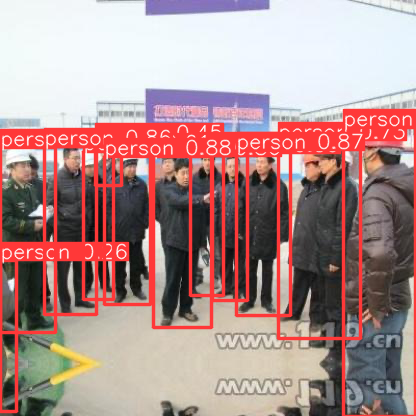

          xmin        ymin        xmax        ymax  confidence  class    name
0   104.170273  156.617310  150.976349  304.504791    0.882408      0  person
1   236.750443  150.550964  290.038269  315.053528    0.870337      0  person
2   153.390350  156.427200  211.878693  327.208191    0.863720      0  person
3    44.538532  146.478973   96.216698  314.349091    0.858776      0  person
4   343.789062  127.673851  415.618103  416.000000    0.769651      0  person
5     0.013243  147.638046   55.907398  332.140167    0.759681      0  person
6   278.122406  140.315781  360.190155  338.358215    0.730654      0  person
7    83.051422  151.208939  113.390182  299.455200    0.605101      0  person
8   212.140137  153.995941  247.700348  300.406738    0.586683      0  person
9   190.681625  150.430359  223.916489  295.494232    0.504118      0  person
10   95.822411  141.894806  121.131310  185.376694    0.447544      0  person
11    0.000000  260.230469   16.675316  411.686707    0.262508  

In [6]:
results.show()
print(results.pandas().xyxy[0])

for i in range(len(results.pandas().xyxy[0].name)):
    print("Object",i,results.pandas().xyxy[0].name[i])

Ultralytics YOLOv8.0.43 🚀 Python-3.8.10 torch-1.13.1+cu116 CPU
Model summary (fused): 218 layers, 25840918 parameters, 0 gradients, 78.7 GFLOPs

image 1/1 /content/drive/MyDrive/SDAAI/Capstone Project/Safety Hat/Images/hard_hat_workers0.png: 640x640 2 Hardhats, 3 NO-Hardhats, 1710.6ms
Speed: 5.4ms preprocess, 1710.6ms inference, 1.1ms postprocess per image at shape (1, 3, 640, 640)


tensor([[3.57000e+02, 1.14000e+02, 4.08000e+02, 1.57000e+02, 4.59514e-01, 0.00000e+00],
        [1.73000e+02, 1.54000e+02, 1.94000e+02, 1.90000e+02, 4.38665e-01, 1.00000e+00],
        [2.00000e+02, 1.47000e+02, 2.18000e+02, 1.75000e+02, 4.32711e-01, 1.00000e+00],
        [3.01000e+02, 1.42000e+02, 3.23000e+02, 1.83000e+02, 3.66209e-01, 0.00000e+00],
        [6.00000e+01, 1.41000e+02, 8.30000e+01, 1.76000e+02, 2.89870e-01, 1.00000e+00]])


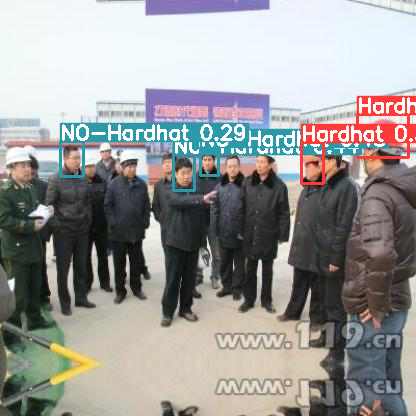

In [7]:
from ultralyticsplus import YOLO, render_result

# load model
model = YOLO('keremberke/yolov8m-hard-hat-detection')

# set model parameters
model.overrides['conf'] = 0.25  # NMS confidence threshold
model.overrides['iou'] = 0.45  # NMS IoU threshold
model.overrides['agnostic_nms'] = False  # NMS class-agnostic
model.overrides['max_det'] = 1000  # maximum number of detections per image

# set image
#image = 'https://github.com/RP-SDAAI/Capstone-Project/blob/72573878f2546c1c2984c3e1006ef8e7c72672ec/Helmet-Example01.jpg'

#image = 'https://github.com/ultralytics/yolov5/raw/master/data/images/zidane.jpg'

# perform inference
results = model.predict(image_path)

# observe results
print(results[0].boxes)
render = render_result(model=model, image=image_path, result=results[0])
render.show()